In [1]:
import sys
sys.path += ['layers']
import numpy as np
from data_utils import get_CIFAR10_data

from init_base_model import init_base_model
from train_custom import train_custom

%load_ext autoreload
%autoreload 2

### Load Data & Partition

In [2]:
X_train, y_train, X_test, y_test = get_CIFAR10_data()

### TRAIN DATA TINY
n_train = 100
X_train_tiny = X_train[:,:,:, :n_train]
y_train_tiny = y_train[:n_train]

### TEST/VALIDATION DATA TINY
n_test = 1000
X_test_tiny = X_test[:,:,:,:n_test]
y_test_tiny = y_test[:n_test]

Train data shape:  (32, 32, 3, 50000)
Train labels shape:  (50000,)
Test data shape:  (32, 32, 3, 10000)
Test labels shape:  (10000,)


In [3]:
# SET PARAMS HERE
learning_rate = 1e-2 # already did 1e3, 1e4
weight_decay = 1e-5 # lready did 1e-6
batch_size = 64 # already did 32
live_plot_on = False
itr_to_plot = 50
verbose = True
early_stopping_on = True
calculate_test = True
itr_to_test = 100
numIters = 15000 # already did 10k
save_file = f"\\test_full_dropout_model_2"
p_act = 0.875

# other params
# save_plot - if you want to save performance plot out (True)
# save path - where to put train model and plot (\results foler)

# PACK INTO PARAMS DICT
params = {
    "learning_rate" :learning_rate, # default 0.01
    "weight_decay":weight_decay ,   # default 0.0005
    "batch_size" : batch_size,      # default 128
    "save_file" : save_file,        # default model
    "live_plot_on" : live_plot_on,
    "itr_to_plot" : itr_to_plot,    # how many iterations until live plot refresh
    "verbose" : verbose,
    "early_stopping_on" : early_stopping_on, # defualt True
    "calculate_test": calculate_test,        # bool for validation checks, default true
    "itr_to_test": itr_to_test,              # n iterations between validation check
    "X_test" : X_test_tiny,                  # validation set, can be empty
    "y_test" : y_test_tiny,                  # validation set, can be empty
    "p_act" : p_act                       # for dropout percentage to keep active 
    }

In [4]:
model = init_base_model()

Input size:
[32, 32, 3]
Layer 0 output size: 
(28, 28, 3)
Layer 1 output size: 
(14, 14, 3)
Layer 2 output size: 
(14, 14, 3)
Layer 3 output size: 
(588,)
Layer 4 output size: 
(10,)
Final output size:
(10,)
Provided output size (should match above):
10
(Batch dimension not included)


*****Starting training! p: 0.875,bs: 64, lr: 0.01 wd: 1e-05, n_images: 50000, n_test: 1000*****
Fished itr 0 / 15000; cost: 2.99749 train: 0.1875 val: 0.113
Fished itr 1 / 15000; cost: 3.14951 train: 0.09375 val: 0.113
Fished itr 2 / 15000; cost: 3.20659 train: 0.078125 val: 0.113
Fished itr 3 / 15000; cost: 2.80209 train: 0.15625 val: 0.113
Fished itr 4 / 15000; cost: 2.58943 train: 0.125 val: 0.113
Fished itr 5 / 15000; cost: 2.9323 train: 0.109375 val: 0.113
Fished itr 6 / 15000; cost: 2.84893 train: 0.15625 val: 0.113
Fished itr 7 / 15000; cost: 2.95709 train: 0.109375 val: 0.113
Fished itr 8 / 15000; cost: 2.76454 train: 0.09375 val: 0.113
Fished itr 9 / 15000; cost: 2.9925 train: 0.0625 val: 0.113
Fished itr 10 / 15000; cost: 2.75396 train: 0.09375 val: 0.113
Fished itr 11 / 15000; cost: 2.43269 train: 0.171875 val: 0.113
Fished itr 12 / 15000; cost: 2.79326 train: 0.0625 val: 0.113
Fished itr 13 / 15000; cost: 2.6253 train: 0.078125 val: 0.113
Fished itr 14 / 15000; cost: 2.6476

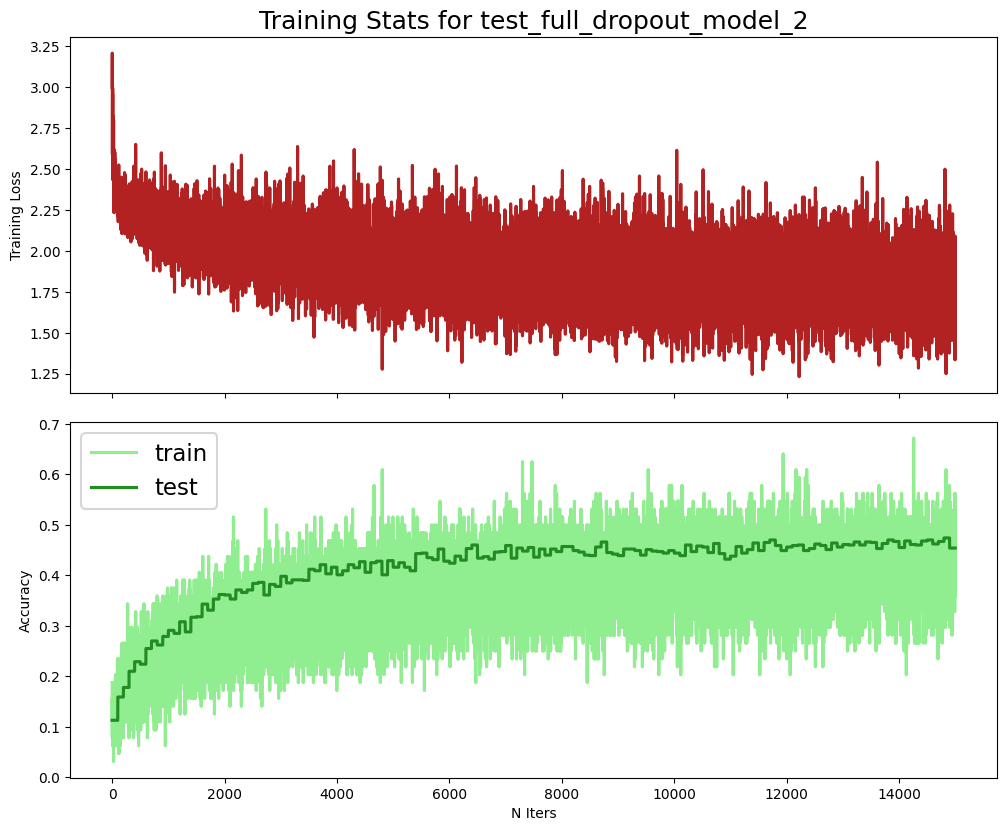

In [5]:
trained_model, loss, accuracy, test_accuracy, time = train_custom(
    model,
    X_train, 
    y_train, 
    params, 
    numIters
    )

## EVAL 

In [6]:
from utils import save_out_model_info
from utils import SAVE_PATH
from utils import test

import pandas as pd

try:
    loss
except:
    import pandas as pd
    time = 10115
    save_file = params["save_file"]
    model_fit_info_df = pd.read_csv(SAVE_PATH + save_file + '_fit_data.csv')
    loss = model_fit_info_df["loss"]
    accuracy = model_fit_info_df["train_acc"]
    test_accuracy = model_fit_info_df["val_acc"]
    
    trained_model = np.load(SAVE_PATH + save_file + '.npz', allow_pickle=True)
    trained_model = dict(model)

In [7]:
eval_accuracy = test(trained_model, X_test, y_test)

running test on 10000 images
accuracy is 0.463


In [8]:
fit_df, summary_df = save_out_model_info(
    params, 
    loss,
    train_accuracy = accuracy,
    val_accuracy = test_accuracy,
    time=time, 
    save_and_return=True,
    eval_accuracy = eval_accuracy)

\test_full_dropout_model_2 model fit df saved
\dropout_model_summary updated


In [9]:
summary_df

,p_act,learning_rate,weight_decay,save_file,batch_size,numIters,time,eval_acc,loss_min,loss_mean,loss_max,train_acc_min,train_acc_mean,train_acc_max,val_acc_min,val_acc_mean,val_acc_max
0,1.000,0.01,0.00001,\test_full_dropout_model_1,64,15000,170.39,0.469,1.097353,1.630527,1.630527,0.06250,0.417892,0.417892,0.087,0.41396,0.41396
1,0.875,0.01,0.00001,\test_full_dropout_model_2,64,15000,168.57,0.463,1.231398,1.906427,1.906427,0.03125,0.359465,0.359465,0.113,0.41522,0.41522


In [10]:
fit_df.describe()

,loss,train_acc,val_acc
count,15000.000000,15000.000000,15000.000000
mean,1.906427,0.359465,0.415220
std,0.213353,0.085799,0.067189
min,1.231398,0.031250,0.113000
25%,1.755087,0.312500,0.403000
50%,1.898822,0.359375,0.443000
75%,2.052956,0.421875,0.456000
max,3.206589,0.671875,0.474000
